In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore")

In [129]:
df=pd.read_csv('Chicago_Data/RT_Data_final_v3.csv',index_col=0)
df.rename(columns={'Reponder':'Responder'},inplace=True)
df["% Officer Maxed"]=round(df['Officers Maxed']/df.loc[:,'RTs'].apply(len),2)
df.head()

,Mean,Median,Max,Officers Maxed,RTs,Time List,Tot. Officer Demand,percentage,Responder,Grouping,% Officer Maxed
Index_fall_0.5_0__0.1,58.638708,34.006741,391.684303,157,"[4.031186014142444, 1.0585106316875244, 1.2173...","[1.0, 1.0, 1.0, 5.0, 5.0, 30.0, 30.0, 39.0, 47...","[2, 4, 6, 9, 10, 12, 11, 12, 14, 13, 15, 18, 2...",0.1,Police,Index,0.01
nonIndex_fall_0.5_0__0.9,3.189469,2.979565,9.133439,0,"[5.014656008052992, 4.897465420607205, 5.66690...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1, 2, 3, 4, 6, 7, 8, 10, 12, 7, 8, 9, 5, 5, 6...",0.9,Alternative,Index,0.00
Index_fall_0.5_0__0.2,14.590910,4.364969,118.667287,85,"[4.031186014142444, 4.031186014142444, 1.05851...","[1.0, 1.0, 1.0, 5.0, 5.0, 30.0, 30.0, 39.0, 47...","[2, 4, 6, 9, 7, 9, 6, 8, 11, 10, 12, 15, 18, 1...",0.2,Police,Index,0.01
nonIndex_fall_0.5_0__0.8,3.189469,2.979565,9.133439,0,"[5.014656008052992, 4.897465420607205, 5.66690...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1, 2, 3, 4, 6, 7, 8, 10, 12, 7, 8, 9, 5, 5, 6...",0.8,Alternative,Index,0.00
Index_fall_0.5_0__0.3,6.652795,3.220244,82.582513,27,"[4.031186014142444, 4.031186014142444, 2.77464...","[1.0, 1.0, 1.0, 5.0, 5.0, 30.0, 30.0, 39.0, 47...","[2, 4, 6, 9, 7, 9, 5, 7, 10, 9, 11, 14, 17, 14...",0.3,Police,Index,0.00


In [130]:
df.query('Grouping=="BAU" and percentage ==1.0 ').describe()

,Mean,Median,Max,Officers Maxed,percentage,% Officer Maxed
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,3.236910,2.834363,17.033712,2.642857,1.0,0.0
std,0.169113,0.073847,10.406461,9.607922,0.0,0.0
min,3.025354,2.607218,9.452810,0.000000,1.0,0.0
25%,3.188138,2.799428,10.076090,0.000000,1.0,0.0
50%,3.207628,2.823343,10.473482,0.000000,1.0,0.0
75%,3.237996,2.893483,23.888539,1.000000,1.0,0.0
max,4.019008,2.959745,39.460685,51.000000,1.0,0.0


### Below is a function to create a dist plot to compares scenarios
* You can compare two situations, and for each situation you can customize all the parameters
* Two scenarios are shown below

In [159]:
def dist_plot(df,percentage1,responder1,index1,profile_type1,percentage2,responder2,index2,profile_type2,title,file_name):
    allRTs_1=[]
    allRTs_2=[]
    #create parameter to filter by daily profile
    
    
    
    df1=df.query('percentage == @percentage1 and Responder == @responder1 and Grouping== @index1')
 
    df1=df1.loc[[i for i in df1.index if '_'+profile_type1+'_' in i]] 
    for i in df1.index:
        res = json.loads(df1.loc[i,'RTs'])
        allRTs_1+=res
        
    df2=df.query('percentage == @percentage2 and Responder == @responder2 and Grouping== @index2')

    df2=df2.loc[[i for i in df2.index if '_'+profile_type2+'_' in i]] 
    for i in df2.index:
        res = json.loads(df2.loc[i,'RTs'])
        allRTs_2+=res

    allRTs_2=[i+0.016 for i in allRTs_2]
    allRTs_1=[i+0.016 for i in allRTs_1]
    plt.figure(figsize=(10,6))

    label1=str(percentage1)+' staffing, '+profile_type1+'% day, '+index1
    label2=str(percentage2)+' staffing, '+profile_type2+'% day, '+index2

#     label1='Median day,'+index1
#     label2='95th Percentile Day, '+index2
#     print(0 in allRTs_1)
#     print(0 in allRTs_2)
#     print('allRTs_1',allRTs_1,'allRTs_2',allRTs_2)
   # sns.histplot(allRTs_1, kde=True, stat='density', label=label1, color='orange', ec='w');
    #sns.histplot(allRTs_2, kde=True, stat='density', label=label2, ec='w');
    
    sns.histplot(np.log(allRTs_1), kde=True, stat='density', label=label1, color='orange', ec='w');
    sns.histplot(np.log(allRTs_2), kde=True, stat='density', label=label2, ec='w');


    plt.ylabel('Density',fontsize=22)
    plt.xlabel('Response Time (Minutes)',fontsize=22)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.title(title,fontsize=26);

    plt.legend(fontsize=18);
    plt.savefig('Chicago_data/'+file_name+'.png');

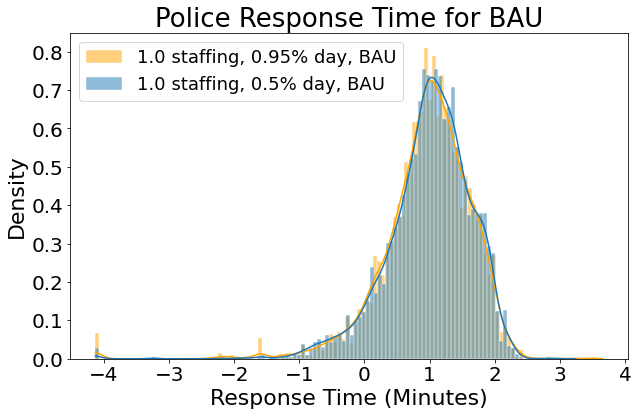

In [160]:
#results section 1
dist_plot(df,
          percentage1=1.0, #[0.1,0.2,..1.0] 
          responder1='Police', #"Police","Alternative"
          index1='BAU', #"Index","Violent",'BAU'
          profile_type1="0.95",#'worst_case','0.5','0.25','0.75',0.95
          
          percentage2=1.0, #[0.1,0.2,..1.0]
          responder2='Police', #"Police","Alternative",'BAU'
          index2='BAU',#"Index","Violent"
          profile_type2='0.5',#'worst_case','0.5','0.25','0.75',0.95
          title='Police Response Time for BAU',
          file_name='BAU_dist')



In [133]:
dist_plot(df,
          percentage1=0.5, #[0.1,0.2,..1.0]
          responder1='Police', #"Police","Alternative"
          index1='Violent', #"Index","Violent",'BAU'
          profile_type1="0.95",#'worst_case','0.5','0.25','0.75',0.95
          label1='Worst Case',
          percentage2=0.5, #[0.1,0.2,..1.0]
          responder2='Police', #"Police","Alternative"
          index2="Violent",#"Index","Violent",'BAU'
          profile_type2='0.5',#'worst_case','0.5','0.25','0.75',0.95
          label2='Median',
          title='Police Response Time for Violent Crime, 20% Staffing')

TypeError: dist_plot() got an unexpected keyword argument 'label1'

### Below is a function to create a line plot to RT over staffing levels
* You can select the type of aggreation for the response times (mean, max, median) for each daily scenarios and then you can select how/if these are aggregated over the days

In [ ]:
def make_lineplot(metric='Mean',agg_type='mean',responder='Police',grouping='BAU',file_name='rt_plot'):
    
    df_index=df.query('Responder == @responder and Grouping == @grouping')
    df1=df_index.loc[[i for i in df_index.index if '_0.5_' in i]] 
    df2=df_index.loc[[i for i in df_index.index if '_0.95_' in i]] 
    df3=df_index.loc[[i for i in df_index.index if 'worst_case_' in i]] 


    plt.figure(figsize=(10,6))

    if agg_type=='None':
        sns.lineplot(df1['percentage'].values,df1[metric].values,label=grouping+', Median')
        sns.lineplot(df2['percentage'].values,df2[metric].values,label=grouping+', 95th')
        sns.lineplot(df3['percentage'].values,df3[metric].values,label=grouping+', Worst Case')

    else:
        df1=df1[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df2=df2[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df3=df3[[metric,'percentage']].groupby('percentage').agg(agg_type)
        
        sns.lineplot(df1.index,df1[metric].values,label=grouping+', Median')
        sns.lineplot(df2.index,df2[metric].values,label=grouping+', 95th')
        sns.lineplot(df3.index,df3[metric].values,label=grouping+', Worst Case')


    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(metric+' '+responder+ ' Response Time: '+grouping+' Scenario',fontsize=16)
    plt.legend(fontsize=12);
    plt.savefig('Chicago_data/'+file_name+'.png');

In [ ]:
df_bau= df.query('Responder == "Police" and Grouping == "BAU"')
df1_pol=df_bau.loc[[i for i in df_bau.index if '0.5_' in i]] 
df2_pol=df1_pol.loc[[i for i in df1_pol.index if '_0.1' in i]] 

In [ ]:
df2_pol[['Mean',  'Max', 'Officers Maxed']].mean()

In [ ]:
df_bau= df.query('Responder == "Police" and Grouping == "BAU"')
df1_pol=df_bau.loc[[i for i in df_bau.index if '_0.5_' in i]] 
df2_pol=df1_pol.loc[[i for i in df1_pol.index if '_0.5' in i]]
df2_pol


In [ ]:
round(df['Officers Maxed']/len(df['RTs']),2)

In [ ]:
j=0.1
df_bau= df.query('Responder == "Police" and Grouping == "BAU"')
df_wc=df_bau.loc[[i for i in df_bau.index if '_0.95_' in i]] 
df_wc=df_wc.loc[[i for i in df_wc.index if '__'+str(j) in i]]
df_wc=df_wc[['Mean',  'Max', "% Officer Maxed"]]
df_wc.columns=['Worst-Case Mean',  'Worst-Case Max', '% Worst-Case Officers Maxed']
#df_wc=df_wc.mean()
#wc_resp_dict[str(j)]=df_wc

In [ ]:
df_wc

In [ ]:
df_wc

# Plots for Paper

In [219]:
#BAU
median_resp_dict={}
wc_resp_dict={}
for j in [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    df_bau= df.query('Responder == "Police" and Grouping == "BAU"')
    df_med= df_bau.loc[[i for i in  df_bau.index if '_0.5_' in i]] 
    df_med=df_med.loc[[i for i in df_med.index if '__'+str(j) in i]]
    df_med=df_med[['Mean',  'Max', "% Officer Maxed"]]
    df_med.columns=['Median Mean',  'Median Max', '% Median Officers Maxed']
    df_med=df_med.mean()
    median_resp_dict[str(j)]=df_med
    
    df_wc=df_bau.loc[[i for i in df_bau.index if '_0.95_' in i]] 
    df_wc=df_wc.loc[[i for i in df_wc.index if '__'+str(j) in i]]
    df_wc=df_wc[['Mean',  'Max', "% Officer Maxed"]]
    df_wc.columns=['Worst-Case Mean',  'Worst-Case Max', '% Worst-Case Officers Maxed']
    df_wc=df_wc.mean()
    wc_resp_dict[str(j)]=df_wc
    
wc_df=pd.DataFrame(wc_resp_dict).T
med_df=pd.DataFrame(median_resp_dict).T

wc_df.index.set_names('% Staffing',inplace=True)
med_df.index.set_names('% Staffing',inplace=True)
round(med_df.join(wc_df),2)

,Median Mean,Median Max,% Median Officers Maxed,Worst-Case Mean,Worst-Case Max,% Worst-Case Officers Maxed
% Staffing,,,,,,
1.0,3.22,12.88,0.00,3.17,20.36,0.00
0.9,3.23,13.75,0.00,3.19,21.53,0.00
0.8,3.25,18.86,0.00,3.24,26.92,0.00
0.7,3.30,25.77,0.00,3.35,32.91,0.00
0.6,3.40,31.55,0.00,3.54,37.11,0.00
0.5,3.76,40.83,0.00,4.01,52.42,0.00
0.4,4.78,54.76,0.00,5.57,72.09,0.00
0.3,8.20,87.20,0.00,10.01,123.40,0.01
0.2,25.43,264.48,0.01,34.42,305.92,0.01


In [214]:
wc_df.index

Index(['1.0', '0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1'], dtype='object', name='test')

In [213]:
wc_df.index.set_names('test',inplace=True)

In [215]:
#index df w Police
median_resp_dict={}
wc_resp_dict={}
for j in [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    df_bau= df.query('Responder == "Police" and Grouping == "Index"')
    df_med= df_bau.loc[[i for i in  df_bau.index if '_0.5_' in i]] 
    df_med=df_med.loc[[i for i in df_med.index if '__'+str(j) in i]]
    df_med=df_med[['Mean',  'Max', "% Officer Maxed"]]
    df_med.columns=['Median Mean',  'Median Max', '% Median Officers Maxed']
    df_med=df_med.mean()
    median_resp_dict[str(j)]=df_med
    
    df_wc=df_bau.loc[[i for i in df_bau.index if '_0.95_' in i]] 
    df_wc=df_wc.loc[[i for i in df_wc.index if '__'+str(j) in i]]
    df_wc=df_wc[['Mean',  'Max', "% Officer Maxed"]]
    df_wc.columns=['Worst-Case Mean',  'Worst-Case Max', '% Worst-Case Officers Maxed']
    df_wc=df_wc.mean()
    wc_resp_dict[str(j)]=df_wc
    
wc_df=pd.DataFrame(wc_resp_dict).T
med_df=pd.DataFrame(median_resp_dict).T

wc_df.index.set_names('% Staffing',inplace=True)
med_df.index.set_names('% Staffing',inplace=True)

round(med_df.join(wc_df),2)

,Median Mean,Median Max,% Median Officers Maxed,Worst-Case Mean,Worst-Case Max,% Worst-Case Officers Maxed
% Staffing,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN
0.9,3.25,10.13,0.00,3.18,20.12,0.00
0.8,3.25,10.13,0.00,3.21,21.04,0.00
0.7,3.28,17.41,0.00,3.30,30.17,0.00
0.6,3.34,24.58,0.00,3.42,32.80,0.00
0.5,3.54,31.39,0.00,3.68,43.07,0.00
0.4,4.14,43.69,0.00,4.57,58.72,0.00
0.3,5.96,63.58,0.00,6.79,97.89,0.00
0.2,14.11,138.92,0.00,17.07,179.57,0.01


In [216]:
#nonindex df w alt responders
median_resp_dict={}
wc_resp_dict={}
for j in [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    df_bau= df.query('Responder == "Alternative" and Grouping == "Index"')
    df_med= df_bau.loc[[i for i in  df_bau.index if '_0.5_' in i]] 
    df_med=df_med.loc[[i for i in df_med.index if '__'+str(j) in i]]
    df_med=df_med[['Mean',  'Max', "% Officer Maxed"]]
    df_med.columns=['Median Mean',  'Median Max', '% Median Officers Maxed']
    df_med=df_med.mean()
    median_resp_dict[str(j)]=df_med
    
    df_wc=df_bau.loc[[i for i in df_bau.index if '_0.95_' in i]] 
    df_wc=df_wc.loc[[i for i in df_wc.index if '__'+str(j) in i]]
    df_wc=df_wc[['Mean',  'Max', "% Officer Maxed"]]
    df_wc.columns=['Worst-Case Mean',  'Worst-Case Max', '% Worst-Case Officers Maxed']
    df_wc=df_wc.mean()
    wc_resp_dict[str(j)]=df_wc
    
wc_df=pd.DataFrame(wc_resp_dict).T
med_df=pd.DataFrame(median_resp_dict).T

wc_df.index.set_names('% Staffing',inplace=True)
med_df.index.set_names('% Staffing',inplace=True)

round(med_df.join(wc_df),2)

,Median Mean,Median Max,% Median Officers Maxed,Worst-Case Mean,Worst-Case Max,% Worst-Case Officers Maxed
% Staffing,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN
0.9,3.17,9.73,0.00,3.15,10.21,0.00
0.8,3.17,9.73,0.00,3.15,10.21,0.00
0.7,3.17,9.73,0.00,3.15,10.21,0.00
0.6,3.18,10.87,0.00,3.16,10.89,0.00
0.5,3.22,21.12,0.00,3.17,12.54,0.00
0.4,3.35,27.22,0.00,3.28,24.93,0.00
0.3,3.80,40.63,0.00,3.94,41.68,0.00
0.2,6.34,78.34,0.00,7.12,65.66,0.01


In [217]:
#violent df w Police
median_resp_dict={}
wc_resp_dict={}
for j in [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    df_bau= df.query('Responder == "Police" and Grouping == "Violent"')
    df_med= df_bau.loc[[i for i in  df_bau.index if '_0.5_' in i]] 
    df_med=df_med.loc[[i for i in df_med.index if '__'+str(j) in i]]
    df_med=df_med[['Mean',  'Max', "% Officer Maxed"]]
    df_med.columns=['Median Mean',  'Median Max', '% Median Officers Maxed']
    df_med=df_med.mean()
    median_resp_dict[str(j)]=df_med
    
    df_wc=df_bau.loc[[i for i in df_bau.index if '_0.95_' in i]] 
    df_wc=df_wc.loc[[i for i in df_wc.index if '__'+str(j) in i]]
    df_wc=df_wc[['Mean',  'Max', "% Officer Maxed"]]
    df_wc.columns=['Worst-Case Mean',  'Worst-Case Max', '% Worst-Case Officers Maxed']
    df_wc=df_wc.mean()
    wc_resp_dict[str(j)]=df_wc
    
wc_df=pd.DataFrame(wc_resp_dict).T
med_df=pd.DataFrame(median_resp_dict).T

wc_df.index.set_names('% Staffing',inplace=True)
med_df.index.set_names('% Staffing',inplace=True)
round(med_df.join(wc_df),2)

,Median Mean,Median Max,% Median Officers Maxed,Worst-Case Mean,Worst-Case Max,% Worst-Case Officers Maxed
% Staffing,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN
0.9,3.26,7.96,0.0,3.13,8.42,0.0
0.8,3.26,7.96,0.0,3.13,8.42,0.0
0.7,3.26,7.96,0.0,3.13,8.42,0.0
0.6,3.26,7.96,0.0,3.13,8.42,0.0
0.5,3.29,9.68,0.0,3.13,8.42,0.0
0.4,3.35,14.26,0.0,3.22,18.36,0.0
0.3,3.69,31.30,0.0,3.55,27.98,0.0
0.2,5.02,48.00,0.0,5.57,48.96,0.0


In [218]:
#nonviolent df w alt responders
median_resp_dict={}
wc_resp_dict={}
for j in [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    df_bau= df.query('Responder == "Alternative" and Grouping == "Violent"')
    df_med= df_bau.loc[[i for i in  df_bau.index if '_0.5_' in i]] 
    df_med=df_med.loc[[i for i in df_med.index if '__'+str(j) in i]]
    df_med=df_med[['Mean',  'Max', "% Officer Maxed"]]
    df_med.columns=['Median Mean',  'Median Max', '% Median Officers Maxed']
    df_med=df_med.mean()
    median_resp_dict[str(j)]=df_med
    
    df_wc=df_bau.loc[[i for i in df_bau.index if '_0.95_' in i]] 
    df_wc=df_wc.loc[[i for i in df_wc.index if '__'+str(j) in i]]
    df_wc=df_wc[['Mean',  'Max', "% Officer Maxed"]]
    df_wc.columns=['Worst-Case Mean',  'Worst-Case Max', '% Worst-Case Officers Maxed']
    df_wc=df_wc.mean()
    wc_resp_dict[str(j)]=df_wc
    
wc_df=pd.DataFrame(wc_resp_dict).T
med_df=pd.DataFrame(median_resp_dict).T

wc_df.index.set_names('% Staffing',inplace=True)
med_df.index.set_names('% Staffing',inplace=True)
round(med_df.join(wc_df),2)

,Median Mean,Median Max,% Median Officers Maxed,Worst-Case Mean,Worst-Case Max,% Worst-Case Officers Maxed
% Staffing,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN
0.9,3.22,12.27,0.00,3.19,20.66,0.00
0.8,3.23,15.95,0.00,3.23,25.47,0.00
0.7,3.28,23.93,0.00,3.34,31.21,0.00
0.6,3.36,29.93,0.00,3.49,36.67,0.00
0.5,3.64,38.22,0.00,3.90,52.28,0.00
0.4,4.45,52.21,0.00,5.21,71.07,0.00
0.3,7.17,80.72,0.00,9.06,120.58,0.01
0.2,21.43,237.93,0.01,28.91,273.71,0.01


In [ ]:
# def make_lineplot_both(metric='Mean',agg_type='mean',grouping='BAU',file_name='rt_plot'):
    
#     df_pol=df.query('Responder == "Police" and Grouping == @grouping')
#     df1_pol=df_pol.loc[[i for i in df_pol.index if '_0.5_' in i]] 
#     df2_pol=df_pol.loc[[i for i in df_pol.index if '_0.95_' in i]] 
#     df3_pol=df_pol.loc[[i for i in df_pol.index if '_worst_case_' in i]] 


#     plt.figure(figsize=(10,6))

#     if agg_type=='None':
#         sns.lineplot(df1_pol['percentage'].values,df1_pol[metric].values,label="Police "+grouping+', Median')
#         sns.lineplot(df2_pol['percentage'].values,df2_pol[metric].values,label="Police "+grouping+', 95th')
#         #sns.lineplot(df3_pol['percentage'].values,df3_pol[metric].values,label="Police "+grouping+', Worst Case')

#     else:
#         df1_pol=df1_pol[[metric,'percentage']].groupby('percentage').agg(agg_type)
#         df2_pol=df2_pol[[metric,'percentage']].groupby('percentage').agg(agg_type)
#         df3_pol=df3_pol[[metric,'percentage']].groupby('percentage').agg(agg_type)
        
#         sns.lineplot(df1_pol.index,df1_pol[metric].values,label="Police "+grouping+', Median')
#         sns.lineplot(df2_pol.index,df2_pol[metric].values,label="Police "+grouping+', 95th')
#         #sns.lineplot(df3_pol.index,df3_pol[metric].values,label="Police "+grouping+', Worst Case')
        
#     if grouping !='BAU':
        
#         df_alt=df.query('Responder == "Alternative" and Grouping == @grouping')

#         df1_alt=df_alt.loc[[i for i in df_alt.index if '0.5_' in i]] 
#         df2_alt=df_alt.loc[[i for i in df_alt.index if '0.95_' in i]] 
#         df3_alt=df_alt.loc[[i for i in df_alt.index if 'worst_case_' in i]] 


#         if agg_type=='None':
#             sns.lineplot(1-df1_alt['percentage'].values,df1_alt[metric].values,label="Alt Non"+grouping+', Median')
#             sns.lineplot(1-df2_alt['percentage'].values,df2_alt[metric].values,label="Alt Non"+grouping+', 95th')
#             #sns.lineplot(1-df3_alt['percentage'].values,df3_alt[metric].values,label="Alt Non"+grouping+', Worst Case')

#         else:
#             df1=df1_alt[[metric,'percentage']].groupby('percentage').agg(agg_type)
#             df2=df2_alt[[metric,'percentage']].groupby('percentage').agg(agg_type)
#             df3=df3_alt[[metric,'percentage']].groupby('percentage').agg(agg_type)

#             sns.lineplot(df1_alt.index,df1_alt[metric].values,label="Alt Non"+grouping+', Median')
#             sns.lineplot(df2_alt.index,df2_alt[metric].values,label="Alt Non"+grouping+', 95th')

#         #sns.lineplot(df3_alt.index,df3_alt[metric].values,label="Alt Non"+grouping+', Worst Case')


#     plt.ylabel('Response Time (Minutes)',fontsize=22)
#     plt.xlabel('% of BAU Police Staffing',fontsize=22)
#     plt.yticks(fontsize=20)
#     plt.xticks(fontsize=20)
#     plt.title(metric+ ' Response Time: '+grouping+' Scenario',fontsize=26)
#     plt.legend(fontsize=18);
#     plt.savefig('Chicago_data/'+file_name+'.png');

In [252]:
def make_lineplot_paper(grouping='BAU',file_name='rt_plot'):
    
    df_pol=df.query('Responder == "Police" and Grouping == @grouping')
    df1_pol=df_pol.loc[[i for i in df_pol.index if '_0.5_' in i]] 
    df2_pol=df_pol.loc[[i for i in df_pol.index if '_0.95_' in i]] 
    


    fig, axes =plt.subplots(1,2,figsize=(20,6))
    lw=3

    sns.lineplot(df1_pol['percentage'].values,df1_pol['Mean'].values,label="Police "+grouping+', Median',ax=axes[0],linewidth=lw)
    sns.lineplot(df2_pol['percentage'].values,df2_pol['Mean'].values,label="Police "+grouping+', 95th',ax=axes[0],linewidth=lw, linestyle='--')

    sns.lineplot(df1_pol['percentage'].values,df1_pol['Max'].values,label="Police "+grouping+', Median',ax=axes[1],linewidth=lw)
    sns.lineplot(df2_pol['percentage'].values,df2_pol['Max'].values,label="Police "+grouping+', 95th',ax=axes[1],linewidth=lw,linestyle='--')

#     sns.lineplot(np.log(df1_pol['percentage'].values),df1_pol['Mean'].values,label="Police "+grouping+', Median',ax=axes[0])
#     sns.lineplot(np.log(df2_pol['percentage'].values),df2_pol['Mean'].values,label="Police "+grouping+', 95th',ax=axes[0])

#     sns.lineplot(np.log(df1_pol['percentage'].values),df1_pol['Max'].values,label="Police "+grouping+', Median',ax=axes[1])
#     sns.lineplot(np.log(df2_pol['percentage'].values),df2_pol['Max'].values,label="Police "+grouping+', 95th',ax=axes[1])


        
    if grouping !='BAU':
        
        df_alt=df.query('Responder == "Alternative" and Grouping == @grouping')

        df1_alt=df_alt.loc[[i for i in df_alt.index if '0.5_' in i]] 
        df2_alt=df_alt.loc[[i for i in df_alt.index if '0.95_' in i]] 
       
        sns.lineplot(1-df1_alt['percentage'].values,df1_alt['Mean'].values,label="Alt Non"+grouping+', Median',ax=axes[0],linewidth=lw)#,linestyle='dashdot')
        sns.lineplot(1-df2_alt['percentage'].values,df2_alt['Mean'].values,label="Alt Non"+grouping+', 95th',ax=axes[0],linewidth=lw,linestyle='dashdot')

        
        sns.lineplot(1-df1_alt['percentage'].values,df1_alt['Max'].values,label="Alt Non"+grouping+', Median',ax=axes[1],linewidth=lw)#,linestyle='dashdot')
        sns.lineplot(1-df2_alt['percentage'].values,df2_alt['Max'].values,label="Alt Non"+grouping+', 95th',ax=axes[1],linewidth=lw,linestyle='dashdot')





    axes[0].set_ylabel('Response Time (Minutes)',fontsize=26)
    axes[0].set_xlabel('% of BAU Police Staffing',fontsize=26)
    axes[1].set_ylabel('Response Time (Minutes)',fontsize=26)
    axes[1].set_xlabel('% of BAU Police Staffing',fontsize=26)
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

    
    axes[0].set_title('Average Response Time: '+grouping+' Scenario',fontsize=28)
    axes[1].set_title('Max Response Time: '+grouping+' Scenario',fontsize=28)


    axes[0].legend(fontsize=22)
    axes[1].legend(fontsize=22)
    plt.savefig('Chicago_data/'+file_name+'.png');

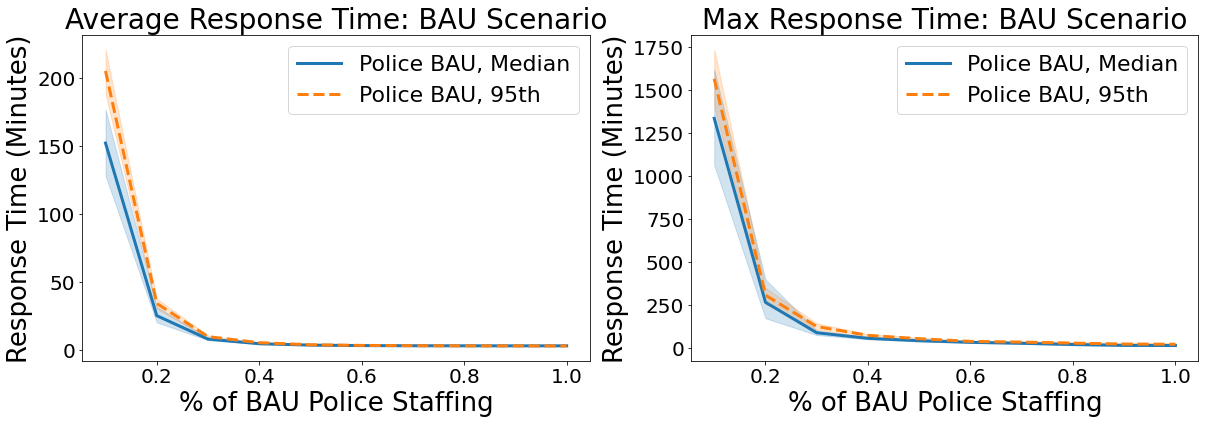

In [253]:
make_lineplot_paper(grouping='BAU',#'BAU','Index','Violent'
              file_name='BAU_RT')

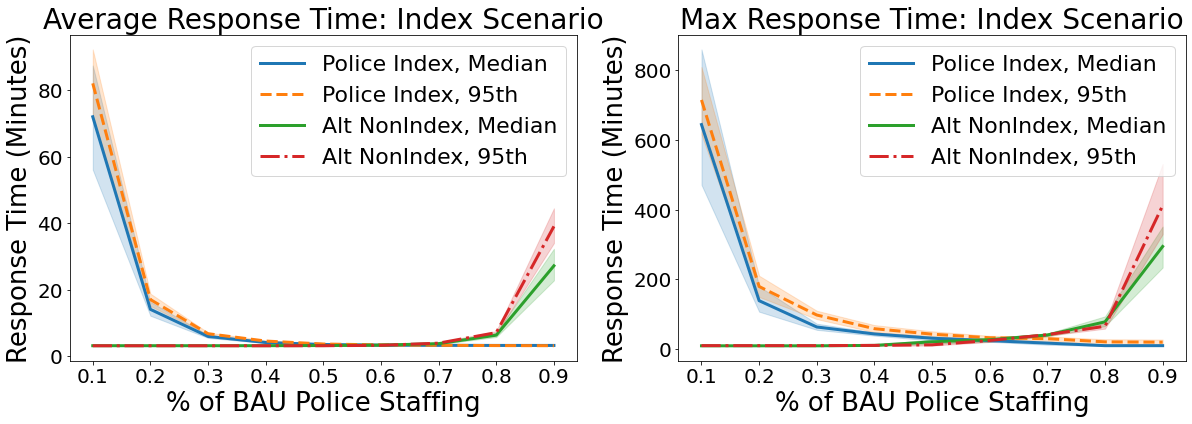

In [256]:
make_lineplot_paper(grouping='Index',#'BAU','Index','Violent'
              file_name='Index_RT')

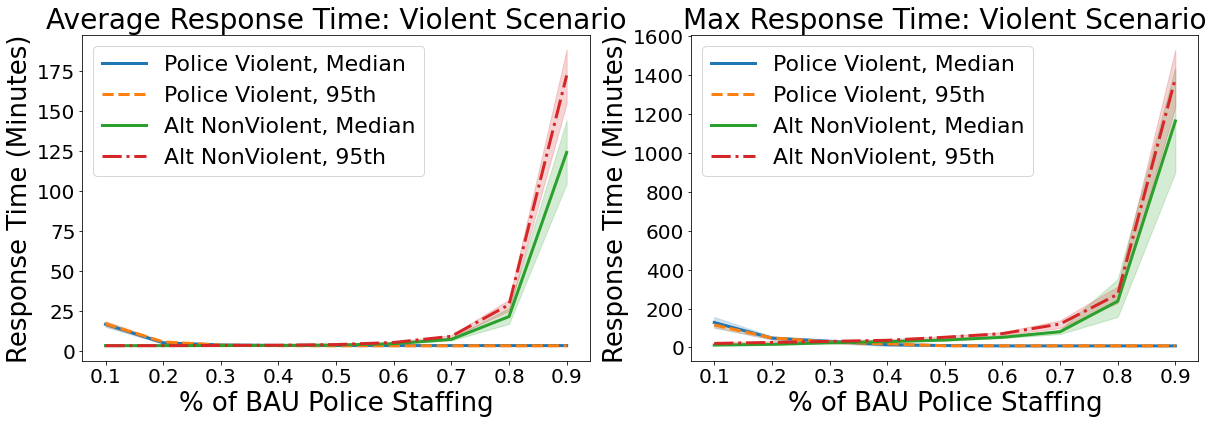

In [255]:
make_lineplot_paper(grouping='Violent',#'BAU','Index','Violent'
              file_name='Violent_RT')

In [110]:
# make_lineplot_both(metric='Mean', #'Median','Mean','Max'
#               agg_type='None', #'median','max','mean',none
#               grouping='Index',#'BAU','Index','Violent'
#               file_name='Index_Mean_RT')

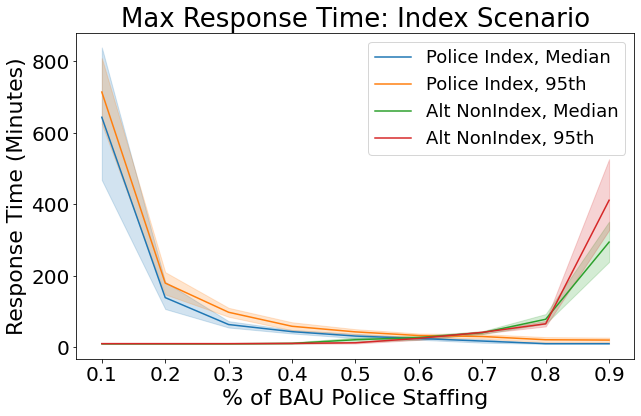

In [252]:
# make_lineplot_both(metric='Max', #'Median','Mean','Max'
#               agg_type='None', #'median','max','mean',none
#               grouping='Index',#'BAU','Index','Violent'
#               file_name='Index_Max_RT')

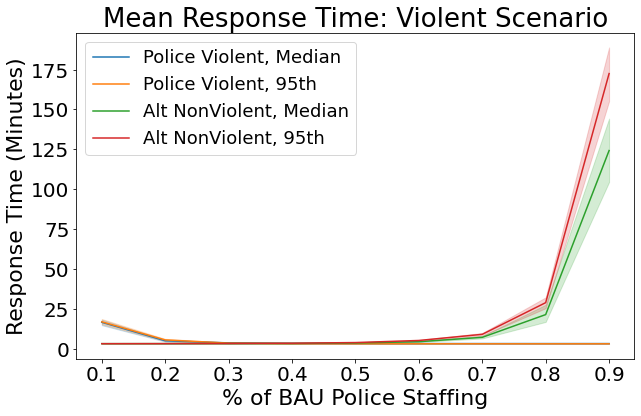

In [253]:
# make_lineplot_both(metric='Mean', #'Median','Mean','Max'
#               agg_type='None', #'median','max','mean',none
#               grouping='Violent',#'BAU','Index','Violent'
#               file_name='Violent_Mean_RT')

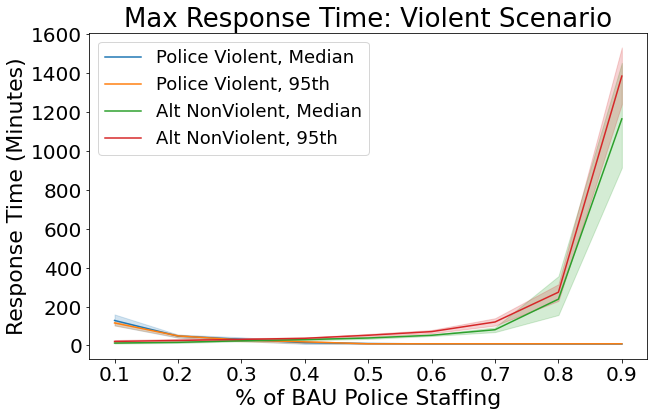

In [254]:
# make_lineplot_both(metric='Max', #'Median','Mean','Max'
#               agg_type='None', #'median','max','mean',none
#               grouping='Violent',#'BAU','Index','Violent'
#               file_name='Violent_Max_RT')

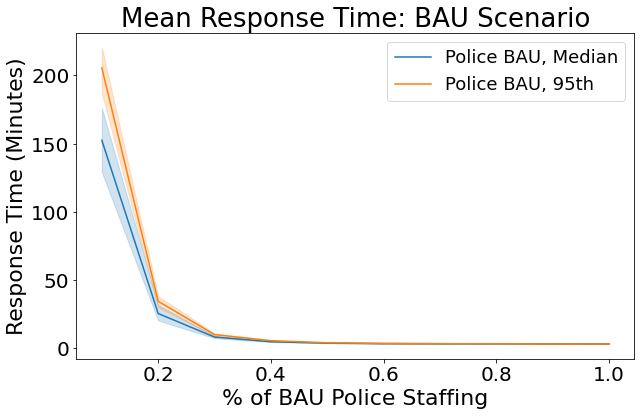

In [279]:
# make_lineplot_both(metric='Mean', #'Median','Mean','Max'
#               agg_type='None', #'median','max','mean',none
#               grouping='BAU',#'BAU','Index','Violent'
#               file_name='BAU_Mean_RT')

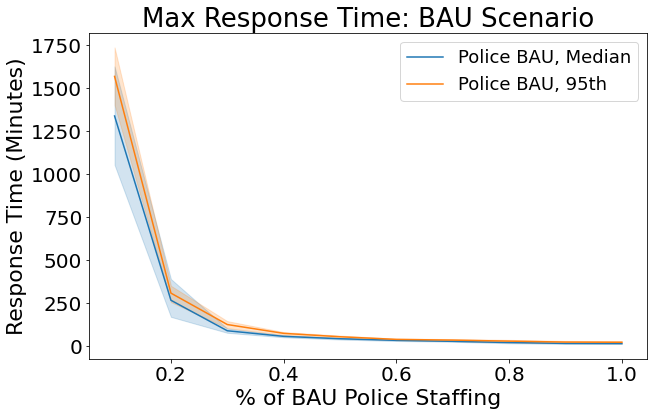

In [278]:
# make_lineplot_both(metric='Max', #'Median','Mean','Max'
#               agg_type='None', #'median','max','mean',none
#               grouping='BAU',#'BAU','Index','Violent'
#               file_name='BAU_Max_RT')

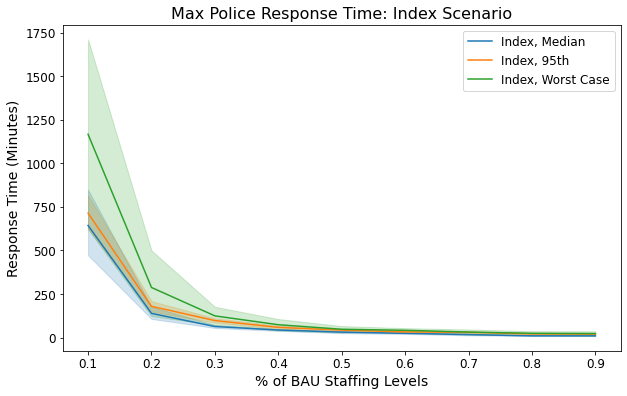

In [256]:
make_lineplot(metric='Max', #'Median','Mean','Max'
              agg_type='None', #'median','max','mean',none
              responder='Police',#Police, Alternative
              grouping='Index')#'BAU','Index','Violent'

In [216]:
def box_plot(df,responder1,index1, Percentage):
    RTs={}
    

    df1=df.query('Responder == @responder1 and Grouping== @index1 and percentage == @Percentage')
    
    
    df_median=df1.loc[[i for i in df1.index if '0.5'+'_' in i]] 
    df_95=df1.loc[[i for i in df1.index if '0.95'+'_' in i]] 

        
    #for j in df1.percentage.unique():
    RT_list1=[]

    for i in df_median.index:

        res = json.loads(df_median.loc[i,'RTs'])
        RT_list1+=res
    RTs['median']=RT_list1
        
    RT_list2=[]
        
    for j in df_95.index:

        res = json.loads(df_95.loc[j,'RTs'])
        RT_list2+=res
    RTs['95']=RT_list2
        
        
    #RT_df=pd.DataFrame(RTs)



    plt.figure(figsize=(10,6))
    sns.violinplot(data=RTs)
    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(responder1+' Response Time for '+index1+' Crime',fontsize=16);
    
    return RT_df


In [82]:
rt_df

,median,95
0,8.590078,8.590078
1,8.590078,8.590078
2,2.032238,2.032238
3,2.549835,2.549835
4,7.161275,7.161275
...,...,...
30610,70.427908,70.427908
30611,326.716163,326.716163
30612,210.608990,210.608990
30613,238.202130,238.202130


In [91]:
rt_df=box_plot(df,responder1='Police', #"Police","Alternative"
          index1='BAU', Percentage=0.1)

KeyError: 0

<Figure size 720x432 with 0 Axes>

### Below is a function to create a box plot  over staffing levels
* You can select the type of scenario you want to see and then look at the distribution of RTs over the staffing levels

In [56]:
def box_plot(df,responder1,index1,profile_type1):
    RTs={}
    

    df1=df.query('Responder == @responder1 and Grouping== @index1')
    df1=df1.loc[[i for i in df1.index if profile_type1+'_' in i]] 

        
    for j in df1.percentage.unique():
        RT_list=[]

        for i in df1.query('percentage == @j').index:

            res = json.loads(df1.loc[i,'RTs'])
            RT_list+=res
            
        RTs[j]=RT_list
    RT_df=pd.DataFrame(RTs)


    plt.figure(figsize=(10,6))
    sns.boxplot(data=RT_df)
    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(responder1+' Response Time for '+index1+' Crime',fontsize=16);



In [ ]:
#do a violin or box plot to compare BAU at 100% over profiles

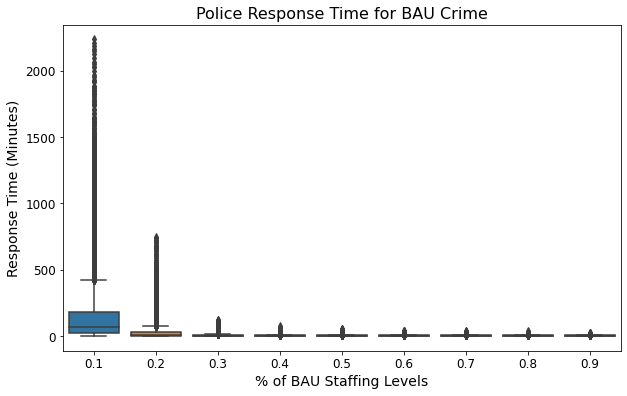

In [58]:
#I am concerned that the distributions are all the same --> it looks like there is only variance in the dist
#when the officers are maxed (IE there is a queue)
box_plot(df,
          responder1='Police', #"Police","Alternative"
          index1='BAU', #"Index","Violent",'BAU'
          profile_type1="0.5")#'worst_case','0.5','0.25','0.75',0.95


In [21]:
df1=df.query('Responder == "Police" and Grouping== "Index"')
df1=df1.loc[[i for i in df1.index if '0.5_' in i]] 
df1.head()

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
Index_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Police,Index
Index_fall_0.5_0__0.2,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.2,Police,Index
Index_fall_0.5_0__0.3,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.3,Police,Index
Index_fall_0.5_0__0.4,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.4,Police,Index
Index_fall_0.5_0__0.5,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.5,Police,Index
Index_fall_0.5_0__0.6,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.6,Police,Index
Index_fall_0.5_0__0.7,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.7,Police,Index
Index_fall_0.5_0__0.8,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.8,Police,Index
Index_fall_0.5_0__0.9,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.9,Police,Index
Index_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Police,Index


In [23]:
df[df['Officers Maxed']>0] #only occurs for 10% occupancy

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
Index_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Police,Index
nonIndex_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Alternative,Index
Index_summer_worst_case_0__0.1,3.569079,3.033894,30.791728,8,"[4.228758683683995, 5.484260939267029, 2.54228...",0.1,Police,Index
nonIndex_summer_worst_case_0__0.1,3.569079,3.033894,30.791728,8,"[4.228758683683995, 5.484260939267029, 2.54228...",0.1,Alternative,Index
Index_spring_worst_case_0__0.1,3.103513,2.714234,10.745043,2,"[3.2322284911827213, 3.9210483179440025, 3.220...",0.1,Police,Index
nonIndex_spring_worst_case_0__0.1,3.103513,2.714234,10.745043,2,"[3.2322284911827213, 3.9210483179440025, 3.220...",0.1,Alternative,Index
Index_all_data_worst_case_0__0.1,4.065488,3.001904,57.593460,20,"[4.155655423962619, 1.3155510954801348, 1.7380...",0.1,Police,Index
nonIndex_all_data_worst_case_0__0.1,4.065488,3.001904,57.593460,20,"[4.155655423962619, 1.3155510954801348, 1.7380...",0.1,Alternative,Index
Index_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Police,Index
nonIndex_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Alternative,Index


In [34]:
df.head()

,Mean,Median,Max,Officers Maxed,RTs,Tot. Officer Demand,District Officer Demand,percentage,Responder,Grouping
Index_all_data_0.25_0__0.1,55.499098,27.132979,517.814652,427,"[2.2718232318838787, 2.2484798115997866, 2.248...","{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....","{'17': [(555.0, 3), (675.0, 2), (885.0, 2), (8...",0.1,Police,Index
nonIndex_all_data_0.25_0__0.9,3.248715,2.838486,10.294876,0,"[6.6339107957299275, 4.930896516584438, 2.2016...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 12.0, 30.0,...","{'17': [(80.0, 2), (470.0, 2), (600.0, 2), (96...",0.9,Alternative,Index
Index_all_data_0.25_0__0.2,11.670511,3.655684,166.102743,198,"[2.2718232318838787, 2.2718232318838787, 2.248...","{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....","{'17': [(555.0, 3), (675.0, 2), (885.0, 2), (8...",0.2,Police,Index
nonIndex_all_data_0.25_0__0.8,3.248715,2.838486,10.294876,0,"[6.6339107957299275, 4.930896516584438, 2.2016...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 12.0, 30.0,...","{'17': [(80.0, 2), (470.0, 2), (600.0, 2), (96...",0.8,Alternative,Index
Index_all_data_0.25_0__0.3,5.063748,2.889347,58.035321,76,"[2.2718232318838787, 2.2718232318838787, 2.271...","{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....","{'17': [(555.0, 3), (675.0, 2), (885.0, 2), (8...",0.3,Police,Index


In [31]:
df['Tot. Officer Demand'][0]#['Time(min)']

"{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36.0, 60.0, 90.0, 105.0, 120.0, 130.0, 150.0, 180.0, 185.0, 188.0, 210.0, 240.0, 265.0, 270.0, 275.0, 280.0, 300.0, 330.0, 360.0, 405.0, 415.0, 420.0, 449.0, 450.0, 465.0, 480.0, 490.0, 510.0, 525.0, 530.0, 537.0, 540.0, 555.0, 560.0, 565.0, 570.0, 580.0, 585.0, 600.0, 615.0, 630.0, 645.0, 650.0, 653.0, 660.0, 662.0, 672.0, 675.0, 680.0, 682.0, 690.0, 705.0, 710.0, 720.0, 723.0, 750.0, 765.0, 767.05, 770.0, 780.0, 788.0, 790.0, 793.0, 800.0, 810.0, 820.0, 825.0, 830.0, 833.0, 840.0, 845.0, 854.0, 855.0, 860.0, 870.0, 885.0, 886.0, 900.0, 910.0, 915.0, 930.0, 955.0, 960.0, 971.0, 980.0, 990.0, 994.0, 1000.0, 1005.0, 1020.0, 1022.0, 1050.0, 1055.0, 1065.0, 1080.0, 1092.0, 1095.0, 1098.0, 1110.0, 1115.0, 1125.0, 1135.0, 1140.0, 1170.0, 1191.0, 1195.0, 1200.0, 1212.0, 1215.0, 1220.0, 1227.0, 1230.0, 1235.0, 1255.0, 1260.0, 1290.0, 1299.0, 1305.0, 1310.0, 1320.0, 1328.0, 1335.0, 1350.0, 1365.0, 1370.0, 1380.0, 1382.0, 1392.0, 1395.0, 1410.0, 1430.

In [33]:
df['Tot. Officer Demand']

Index_all_data_0.25_0__0.1       {'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....
nonIndex_all_data_0.25_0__0.9    {'Time(min)': [0.0, 1.0, 4.0, 5.0, 12.0, 30.0,...
Index_all_data_0.25_0__0.2       {'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....
nonIndex_all_data_0.25_0__0.8    {'Time(min)': [0.0, 1.0, 4.0, 5.0, 12.0, 30.0,...
Index_all_data_0.25_0__0.3       {'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....
                                                       ...                        
BAU_winter_worst_case_0__0.5     {'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...
BAU_winter_worst_case_0__0.6     {'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...
BAU_winter_worst_case_0__0.7     {'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...
BAU_winter_worst_case_0__0.8     {'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...
BAU_winter_worst_case_0__0.9     {'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...
Name: Tot. Officer Demand, Length: 1260, dtype: object

In [44]:
inp=df["Tot. Officer Demand"][0]
inp

"{'Time(min)': [0.0, 1.0, 5.0, 10.0, 11.0, 30.0, 48.0, 55.0, 60.0, 75.0, 90.0, 120.0, 130.0, 140.0, 141.0, 150.0, 160.0, 165.0, 175.0, 180.0, 210.0, 212.0, 240.0, 250.0, 255.0, 270.0, 285.0, 304.0, 310.0, 312.0, 315.0, 330.0, 337.0, 360.0, 420.0, 425.0, 451.0, 465.0, 480.0, 510.0, 540.0, 545.0, 555.0, 580.0, 600.0, 630.0, 640.0, 650.0, 651.0, 655.0, 660.0, 665.0, 670.0, 675.0, 690.0, 695.5833333333334, 697.0, 700.0, 714.0, 720.0, 721.0, 725.0, 730.0, 735.0, 750.0, 760.0, 764.0, 765.0, 770.0, 780.0, 796.0, 810.0, 818.0, 820.0, 825.0, 829.0, 840.0, 845.0, 850.0, 855.0, 870.0, 881.0, 900.0, 908.0, 915.0, 925.0, 945.0, 950.0, 960.0, 970.0, 975.0, 980.0, 985.0, 990.0, 1020.0, 1025.0, 1050.0, 1057.0, 1060.0, 1065.0, 1075.0, 1077.0, 1079.0, 1080.0, 1095.0, 1103.0, 1110.0, 1125.0, 1140.0, 1158.0, 1169.0, 1170.0, 1185.0, 1193.0, 1200.0, 1205.0, 1214.0, 1215.0, 1225.0, 1230.0, 1235.1, 1240.0, 1260.0, 1267.5333333333333, 1300.0, 1320.0, 1330.0, 1335.0, 1340.0, 1345.0, 1350.0, 1365.0, 1370.0, 1380

In [47]:
import json
convertedDict = json.loads(inp)
convertedDict

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [42]:
print(json.dumps(inp))

"{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36.0, 60.0, 90.0, 105.0, 120.0, 130.0, 150.0, 180.0, 185.0, 188.0, 210.0, 240.0, 265.0, 270.0, 275.0, 280.0, 300.0, 330.0, 360.0, 405.0, 415.0, 420.0, 449.0, 450.0, 465.0, 480.0, 490.0, 510.0, 525.0, 530.0, 537.0, 540.0, 555.0, 560.0, 565.0, 570.0, 580.0, 585.0, 600.0, 615.0, 630.0, 645.0, 650.0, 653.0, 660.0, 662.0, 672.0, 675.0, 680.0, 682.0, 690.0, 705.0, 710.0, 720.0, 723.0, 750.0, 765.0, 767.05, 770.0, 780.0, 788.0, 790.0, 793.0, 800.0, 810.0, 820.0, 825.0, 830.0, 833.0, 840.0, 845.0, 854.0, 855.0, 860.0, 870.0, 885.0, 886.0, 900.0, 910.0, 915.0, 930.0, 955.0, 960.0, 971.0, 980.0, 990.0, 994.0, 1000.0, 1005.0, 1020.0, 1022.0, 1050.0, 1055.0, 1065.0, 1080.0, 1092.0, 1095.0, 1098.0, 1110.0, 1115.0, 1125.0, 1135.0, 1140.0, 1170.0, 1191.0, 1195.0, 1200.0, 1212.0, 1215.0, 1220.0, 1227.0, 1230.0, 1235.0, 1255.0, 1260.0, 1290.0, 1299.0, 1305.0, 1310.0, 1320.0, 1328.0, 1335.0, 1350.0, 1365.0, 1370.0, 1380.0, 1382.0, 1392.0, 1395.0, 1410.0, 1430.